In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

Robusnost

In [2]:
g_karate = nx.karate_club_graph()
g_protein = nx.read_edgelist('protein_interaction.edgelist')

In [3]:
def get_giant_component_size(g):
    return len(max(nx.connected_components(g), key = len))

In [4]:
def failure(g, n_steps):
    c = g.copy()
    n_nodes_start = c.number_of_nodes()
    n_nodes_to_remove = max(n_nodes_start//n_steps, 1)
    #n_nodes_to_remove = np.ceil(n_node_start/n_steps)
    
    relative_giant_component_size = []
    relative_giant_component_size.append(1)
    
    relative_n_nodes_removed = []
    relative_n_nodes_removed.append(0)
    
    
    for step in range(1, n_steps + 1):
        if c.number_of_nodes() > n_nodes_to_remove:
            nodes_to_leave = random.sample(list(c.nodes), c.number_of_nodes() - n_nodes_to_remove)
            c = nx.subgraph(c, nodes_to_leave)
            
            giant_component_size = get_giant_component_size(c)
            
            relative_giant_component_size.append(giant_component_size/n_nodes_start)
            relative_n_nodes_removed.append(1- (c.number_of_nodes()/n_nodes_start))
            
        else:
            relative_giant_component_size.append(0)
            relative_n_nodes_removed.append(1)
            
    return relative_giant_component_size, relative_n_nodes_removed

In [5]:
def attack(g, n_steps):
    c = g.copy()
    n_nodes_start = c.number_of_nodes()
    n_nodes_to_remove = max(n_nodes_start//n_steps, 1)
    #n_nodes_to_remove = np.ceil(n_node_start/n_steps)
    
    relative_giant_component_size = []
    relative_giant_component_size.append(1)
    
    relative_n_nodes_removed = []
    relative_n_nodes_removed.append(0)
    
    
    for step in range(1, n_steps + 1):
        if c.number_of_nodes() > n_nodes_to_remove:
            nodes_to_leave = sorted(c.nodes, key = c.degree, reverse = True)[n_nodes_to_remove:]
            c = nx.subgraph(c, nodes_to_leave)
            
            giant_component_size = get_giant_component_size(c)
            
            relative_giant_component_size.append(giant_component_size/n_nodes_start)
            relative_n_nodes_removed.append(1- (c.number_of_nodes()/n_nodes_start))
            
        else:
            relative_giant_component_size.append(0)
            relative_n_nodes_removed.append(1)
            
    return relative_giant_component_size, relative_n_nodes_removed

In [6]:
def plot_comparison(n_nodes_removed, giant_component_failure, giant_component_attack):
    plt.plot(n_nodes_removed, giant_component_failure, color = 'b', label = "Kvar")
    plt.plot(n_nodes_removed, giant_component_attack, color = 'r', label = "Napad")
    plt.legend()
    plt.ylabel("Veličina gigantske komponente")
    plt.xlabel("Uklonjenih čvorova")

In [7]:
giant_component_failure_karate, n_nodes_removed_karate = failure(g_karate, 30)
giant_component_attack_karate, g_nodes_removed_karate = attack(g_karate, 30)

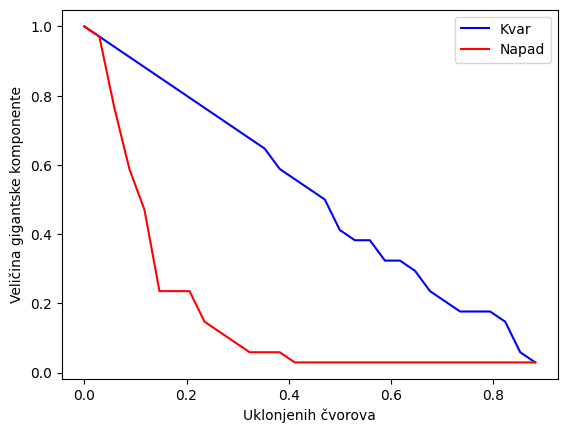

In [8]:
plot_comparison(g_nodes_removed_karate, giant_component_failure_karate, giant_component_attack_karate)

In [9]:
giant_component_failure_protein, n_nodes_removed_protein = failure(g_protein, 30)
giant_component_attack_protein, n_nodes_removed_protein = attack(g_protein, 30)

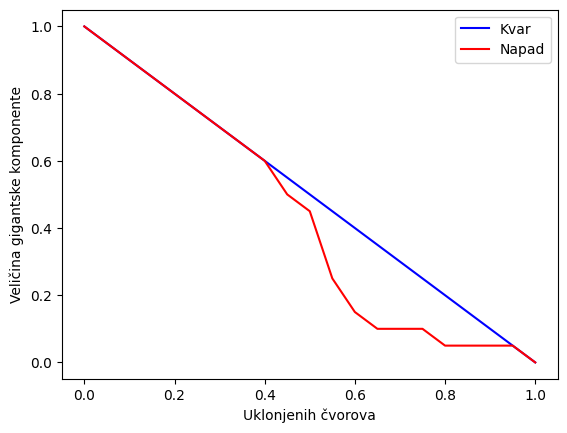

In [10]:
plot_comparison(n_nodes_removed_protein, giant_component_failure_protein, giant_component_attack_protein)

K-jezgrena dekompozicija

In [11]:
max_core = max(list(nx.core_number(g_karate).values()))

In [12]:
k_core_dict = {}
k_shell_dict = {}

for core in range(0, max_core + 2):
    k_core_dict[core] = nx.k_core(g_karate, core)
    k_shell_dict[core] = nx.k_shell(g_karate, core)

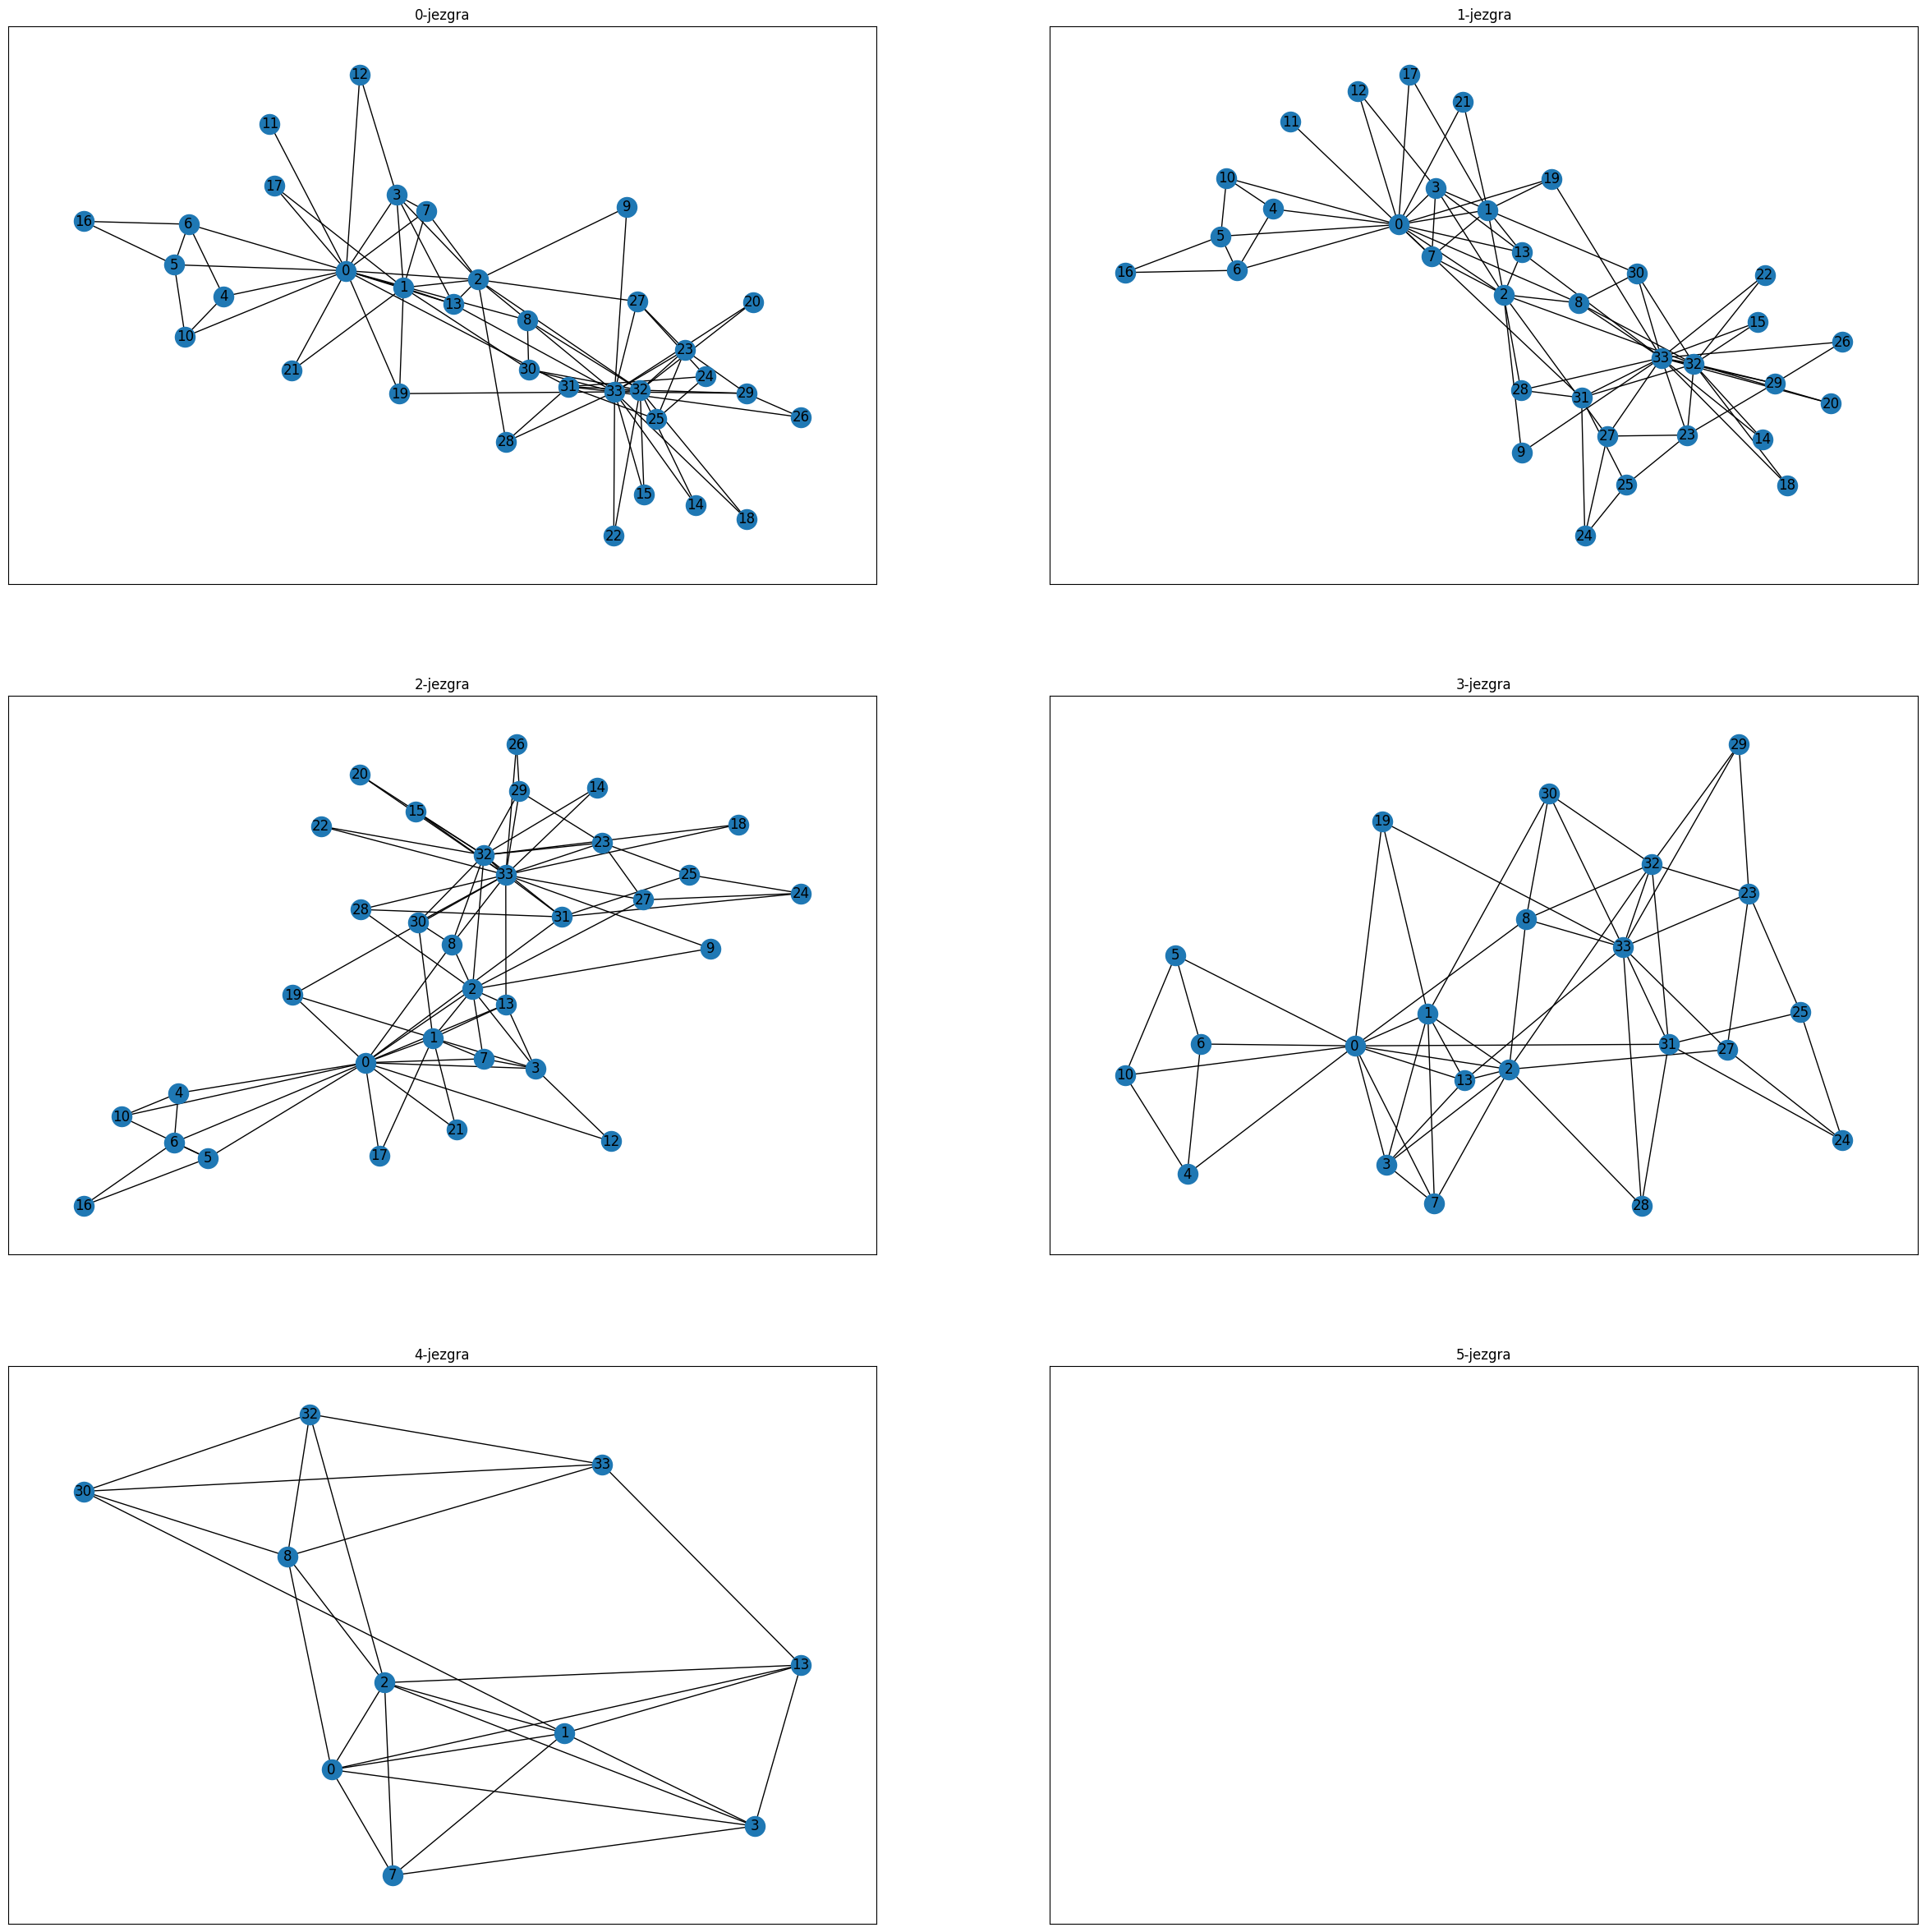

In [13]:
pos = nx.spring_layout(g_karate, seed = 2)

plt.figure(figsize = (30, 30))
plt.subplot(321)
plt.title('0-jezgra')
nx.draw_networkx(k_core_dict[0])

plt.subplot(322)
plt.title('1-jezgra')
nx.draw_networkx(k_core_dict[1])

plt.subplot(323)
plt.title('2-jezgra')
nx.draw_networkx(k_core_dict[2])

plt.subplot(324)
plt.title('3-jezgra')
nx.draw_networkx(k_core_dict[3])

plt.subplot(325)
plt.title('4-jezgra')
nx.draw_networkx(k_core_dict[4])

plt.subplot(326)
plt.title('5-jezgra')
nx.draw_networkx(k_core_dict[5])

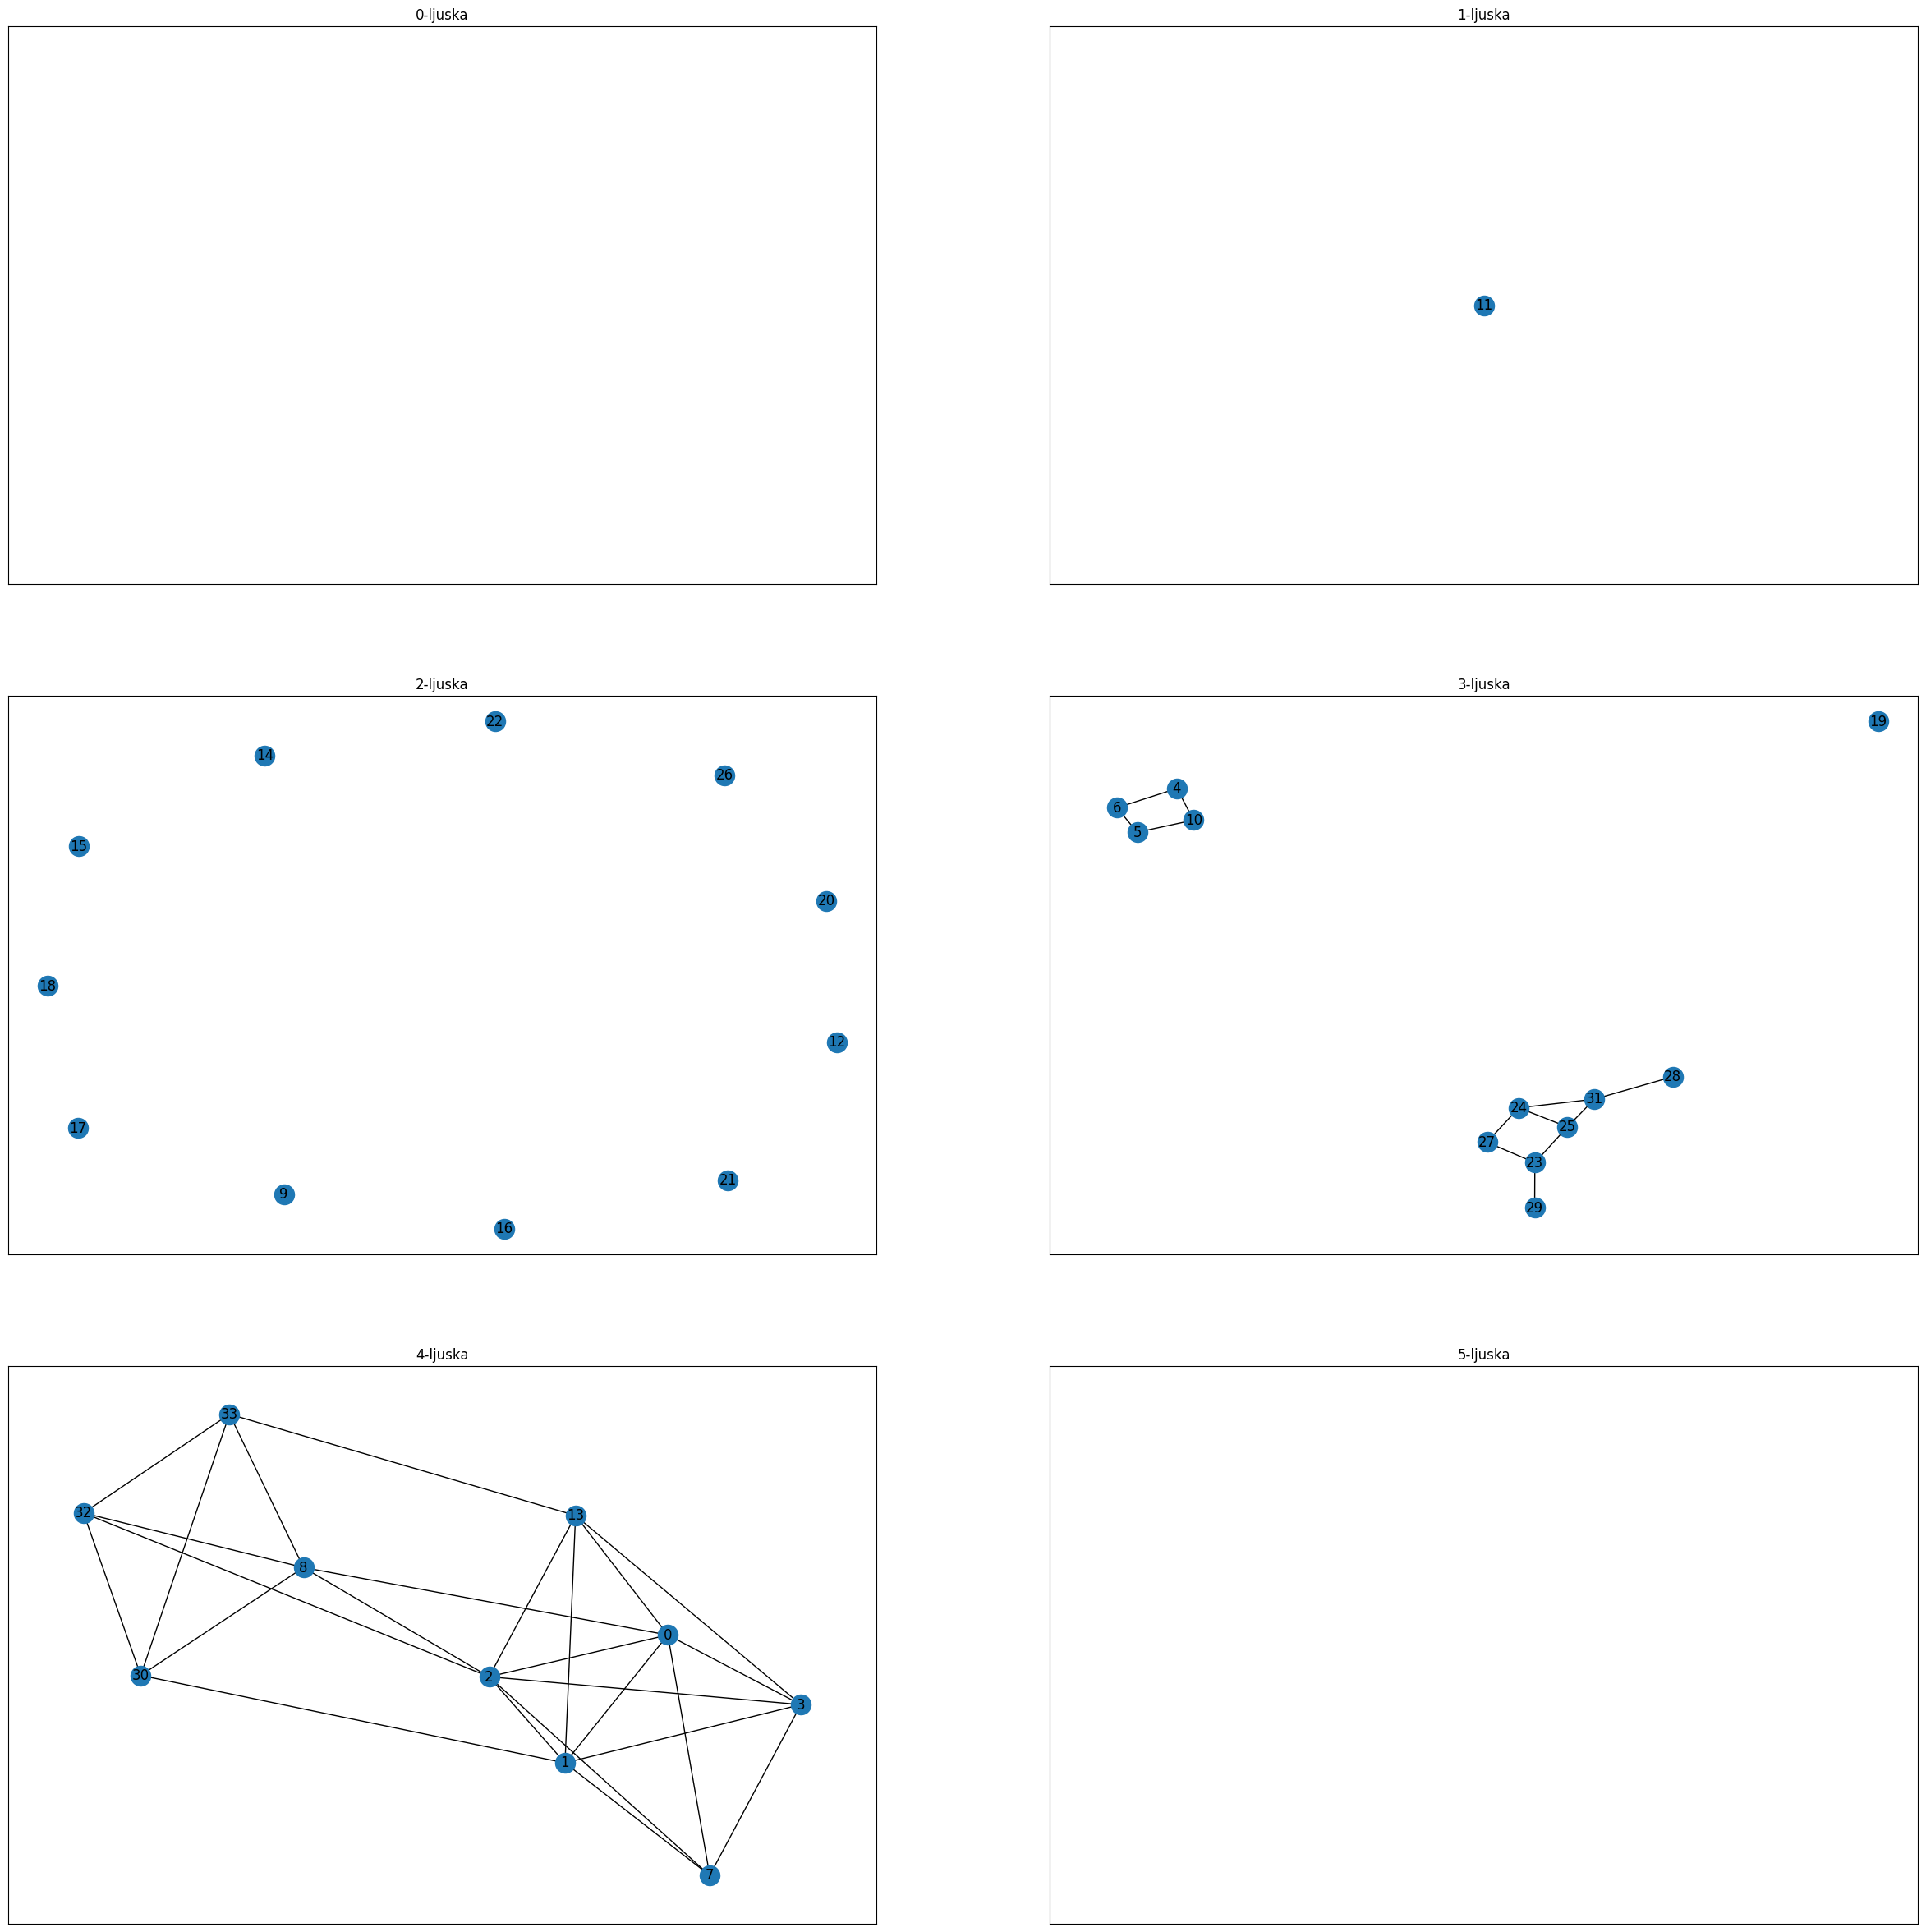

In [14]:
plt.figure(figsize = (30, 30))
plt.subplot(321)
plt.title('0-ljuska')
nx.draw_networkx(k_shell_dict[0])

plt.subplot(322)
plt.title('1-ljuska')
nx.draw_networkx(k_shell_dict[1])

plt.subplot(323)
plt.title('2-ljuska')
nx.draw_networkx(k_shell_dict[2])

plt.subplot(324)
plt.title('3-ljuska')
nx.draw_networkx(k_shell_dict[3])

plt.subplot(325)
plt.title('4-ljuska')
nx.draw_networkx(k_shell_dict[4])

plt.subplot(326)
plt.title('5-ljuska')
nx.draw_networkx(k_shell_dict[5])

# 2.1. USMJERENE MREŽE SOCIJALNIH INTERAKCIJA

U drugom djelu ove pokazne vježbe koristimo znanstvene Twitter podatke za stvaranje i istraživanje usmjerenih mreža društvenih interakcija. 

## DATASET:

In [15]:
import json
search_tweets = json.load(open('science_tweets.json'))

Svaki tweet zapravo je jedna instanca Tweet objekta (https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet)

In [16]:
search_tweets[:2]

[{'created_at': 'Mon Dec 03 14:59:01 +0000 2018',
  'id': 1069606939284422656,
  'id_str': '1069606939284422656',
  'text': 'How to properly cook @ChefBoyardee. Oh and the lava is cool too. #science #NASASocial (Video by Brave Bison) https://t.co/l3R6UMvUTJ',
  'truncated': False,
  'entities': {'hashtags': [{'text': 'science', 'indices': [65, 73]},
    {'text': 'NASASocial', 'indices': [74, 85]}],
   'symbols': [],
   'user_mentions': [{'screen_name': 'ChefBoyardee',
     'name': 'Chef Boyardee',
     'id': 876145244,
     'id_str': '876145244',
     'indices': [21, 34]}],
   'urls': [],
   'media': [{'id': 1069606177363935232,
     'id_str': '1069606177363935232',
     'indices': [109, 132],
     'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1069606177363935232/pu/img/1uN8Rd3GPIJ2f6K7.jpg',
     'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1069606177363935232/pu/img/1uN8Rd3GPIJ2f6K7.jpg',
     'url': 'https://t.co/l3R6UMvUTJ',
     'display_url': 'pic.twitter.

# Twitter retweetanje

Temeljna interakcija u ekosustavu Twittera je "retweet" -- ponovno emitiranje tweeta drugog korisnika vašim pratiteljima. 

## Filtriranje retweetova

U našem skupu podataka nalaze se retweetovi. Objekt tweeta koji se nalazi u našem datasetu je retweet ako uključuje 'retweeted_status'. Napravit ćemo novi skup podataka koji će se sastojati samo od retweetova:

In [17]:
retweets = []
for tweet in search_tweets:
    if 'retweeted_status' in tweet:
        retweets.append(tweet)
len(retweets)

511

## Izrada DiGrafa

Prikazat ćemo tweetove na ovom popisu retweetova u smjeru protoka informacija: od korisnika koji je retweetao do retweetara, korisnika čija je objava retweetana. Budući da korisnik može retweetati objave drugog korisnika više puta, želimo da ovaj graf bude težinski, s brojem retweeta kao težinom - brojimo koliko je puta neki korisnik retweetao objave nekog drugog korisnika.

In [18]:
import networkx as nx

D = nx.DiGraph() #inicijalizacija usmjerenog grafa

for retweet in retweets:
    retweeted_status = retweet['retweeted_status']
    retweeted_sn = retweeted_status['user']['screen_name'] #ime korisnika koji je retweetao
    retweeter_sn = retweet['user']['screen_name'] #ime ciji je tweet retweetan
    
    if D.has_edge(retweeted_sn, retweeter_sn):
        D.edges[retweeted_sn, retweeter_sn]['weight'] += 1
    else:
        D.add_edge(retweeted_sn, retweeter_sn, weight=1)
    

In [19]:
D.edges

OutEdgeView([('AntonioParis', 'invenitmundo'), ('AntonioParis', 'kingchar12'), ('AntonioParis', 'jackattent0011'), ('AntonioParis', 'stuartparks88'), ('AntonioParis', 'BLajeunesse'), ('AntonioParis', 'fueledbyvinyl'), ('AntonioParis', 'AlanJac10051970'), ('AntonioParis', 'Charion1234'), ('AntonioParis', 'EdouardDugas'), ('AntonioParis', 'RoyCalbeck'), ('AntonioParis', 'romanw3_252'), ('AntonioParis', 'MarkKtheUXGuy'), ('AntonioParis', 'OrsonJTrump'), ('AntonioParis', 'AntonioParis'), ('AntonioParis', 'fredvell'), ('AntonioParis', 'AmyHayward1979'), ('AntonioParis', 'daimonoflove'), ('AntonioParis', 'towersunset132'), ('AntonioParis', 'MarioJaraFigue1'), ('AntonioParis', 'BatKat37'), ('AntonioParis', 'TheTaterX'), ('AntonioParis', 'kam75'), ('AntonioParis', 'RogerIceman'), ('AntonioParis', 'KelsTheKat'), ('AntonioParis', 'leticiabarcenas'), ('AntonioParis', 'TheHerme5'), ('AntonioParis', 'JensMeier144'), ('AntonioParis', 'TheAeronut'), ('AntonioParis', 'abid_tanjim'), ('AntonioParis', '

Logika dodavanja bridova je povećati težinu brida za 1 ako brid postoji ili stvoriti brid s težinom 1 ako ne postoji.

Kada pišete kod kao što je ovaj koji se više puta referira na isti usmjereni brid, pazite da budete u skladu sa smjerom brida.

## Analiza grafa

### Najviše retweetani korisnik

Budući da su bridovi u smjeru protoka informacija, out-degree nam daje broj korisnika koji retweetaju određenog korisnika. Možemo dobiti korisnika s najvišim stupnjem izlaza pomoću ugrađene max  funkcije (korisnika čije se objave najviše retweetaju):

In [20]:
max(D.nodes, key=D.out_degree)

'AntonioParis'

ali možemo dobiti i više informacija za "najboljih N" korisnika:

In [21]:
from operator import itemgetter

sorted(D.out_degree(), key=itemgetter(1), reverse=True)[:5]

[('AntonioParis', 49),
 ('JaviTannhauser', 15),
 ('illucifer', 11),
 ('maximaxoo', 10),
 ('BetteAStevens', 8)]

U ovom dijelu koda koristimo činjenicu da D.out_degree() vraća niz (ime, stupanj) tuplova; key=itemgetter(1) govori sortiranoj funkciji da sortira ove tuplove prema njihovoj vrijednosti na indeksu 1. Postavljanje reverse=True govori sortiranoj funkciji da to želimo u silaznom redoslijedu, a [:5] daje nam prvih 5 stavki s rezultirajuće liste.

Međutim, ovo je težinski graf! Prema zadanim postavkama, out_degree() zanemaruje težine rubova. Možemo dobiti izlaznu težinu tako da kažemo funkciji out_degree() da uzme u obzir težinu bridova:

In [22]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('AntonioParis', 50),
 ('JaviTannhauser', 15),
 ('illucifer', 11),
 ('maximaxoo', 10),
 ('AgiwaldW', 9)]

U nekim će slučajevima ova dva rezultata biti ista, npr. ako niti jednog od ovih korisnika nije više puta retweetao isti korisnik. Ovisno o vašem slučaju upotrebe, možete ili ne morate uzeti težine u obzir.

### Detekcija anomalija

Jedna vrsta manipulacije društvenih medija uključuje račune koji stvaraju vrlo malo originalnog sadržaja, umjesto toga "spammaju" retweetove svih sadržaja u određenom razgovoru. To su potencijalno korisnici koji puno više retweetaju od ostalih. Možemo li otkriti da neki korisnici znatno više retweetaju od ostalih? Pogledajmo N korisnika koji najčešće retweetaju:

In [23]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('Tess_blue815', 8),
 ('CastevenLimKHJB', 5),
 ('Emc2CoinHQ', 3),
 ('cosmicscape', 3),
 ('jhainley1', 3)]

### Povezanost

Možemo se pitati predstavljaju li tweetovi jedan veliki razgovor ili mnogo malih razgovora; općenito govoreći, svaka slabo povezana komponenta predstavlja razgovor.

In [24]:
nx.is_weakly_connected(D)

False

Tweetovi definitivno ne predstavljaju jedan veliki razgovor, no ono što možemo očekivati je da postoji velik broj malih razgovora. Pogledajmo koliko:

In [25]:
nx.number_weakly_connected_components(D)

246

### Crtanje grafa

Možemo pokušati nacrtati ovaj graf s čvorovima veličine prema njihovoj izlaznoj snazi:

ModuleNotFoundError: No module named 'scipy'

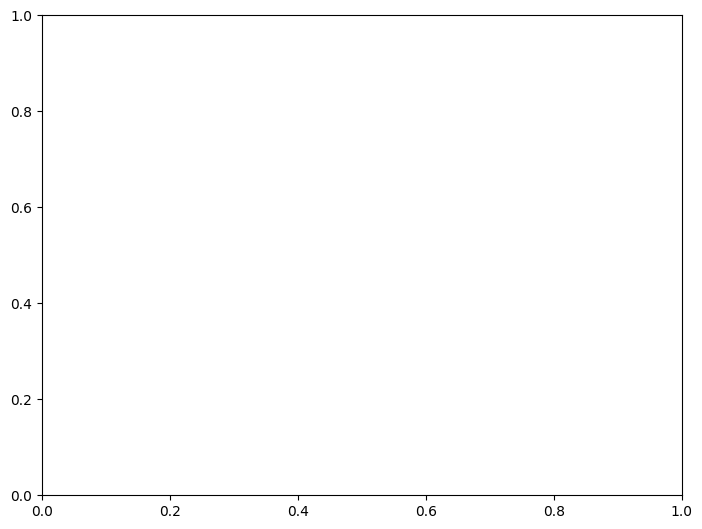

In [26]:
node_sizes = [D.out_degree(n, weight='weight') * 50 for n in D.nodes] # množimo s 50 da bi nam čvorovi na slici izgledali veće

%matplotlib inline
nx.draw(D, node_size=node_sizes)

Imajte na umu da u ovom pojednostavljenom crtežu čvorovi s nultom vanjskom težinom nisu nacrtani na grafu jer je njihova veličina 0. To nam odgovara; ovdje su izvučeni samo korisnici koji su retweetani, ne i oni čije objave nitko nikad nije retweetao.

# Twitter spominjanja

Druga Twitter interakcija između korisnika događa se kada jedan korisnik spomene drugog u tweetu pod svojim @screen_name. Kao primjer, razmotrite sljedeći hipotetski tweet od @osome_iu:

"Check out the new @IUSICE and @USC_ISI research https://..."

Od ovog tweeta stvorili bismo dva brida:

('osome_iu', 'IUSICE')
('osome_iu', 'USC_ISI')

Na nama je u kojem ćemo smjeru povući te rubove, ali moramo biti dosljedni. U ovom primjeru nacrtat ćemo rubove u smjeru toka pozornosti: @osome_iu posvećuje pozornost @IUSICE i @USC_ISI.

## Izrada DiGrafa

Kao što smo na početku spomenuli, svaki tweet predstavljen je značajkom Tweet Object i svaki tweet ima Entitete (https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/entities#entitiesobject) koji uvijek sadržavaju popis 'user_mentions' pa čak i kad je taj popis prazan. Zbog toga nije potrebno filtrirati tweetove koji sadrže spominjanja. 

In [ ]:
import networkx as nx

D = nx.DiGraph()

for tweet in search_tweets:
    tweet_sn = tweet['user']['screen_name']
    for user_mention in tweet['entities']['user_mentions']:
        mentioned_sn = user_mention['screen_name']
        
        edge = (tweet_sn, mentioned_sn)
        if D.has_edge(*edge):
            D.edges[edge]['weight'] += 1
        else:
            D.add_edge(*edge, weight=1)

D.edges

## Analiza grafa

### Najpopularniji korisnici

Budući da su ti bridovi u smjeru protoka pažnje, in-degree nam daje broj drugih korisnika koji spominju određenog korisnika. Možemo dobiti korisnika s najvišim stupnjem pomoću ugrađene max funkcije - korisnika koji se najčešće spominje od strane drugih:

In [ ]:
max(D.nodes, key=D.in_degree)

ali opet možemo dobiti i više informacija za "najboljih N" korisnika - korisnika koji se najčešće spominju:

In [ ]:
from operator import itemgetter

sorted(D.in_degree(), key=itemgetter(1), reverse=True)[:5]

Korištenjem weight='weight' možemo dobiti prvih 5 korisnika prema ulaznoj težini umjesto prema ulaznom stupnju:

In [ ]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

U nekim će slučajevima ova dva rezultata biti ista,npr. ako nijednog od ovih korisnika nije više puta spomenuo isti korisnik. Ovisno o vašem slučaju upotrebe, možete ili ne morate uzeti težine u obzir.

### Pokretaći razgovora - Conversation drivers

Korisnik koji spominje mnoge druge u razgovoru možda "pokreće" razgovor i pokušava uključiti druge u dijalog. Takav korisnik može biti i spam. Da vidimo tko ovdje najviše spominje - ovdje gledamo vrijednost out degree:

In [ ]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

### Povezanost

Možemo pitati predstavljaju li tweetovi dobiveni pretraživanjem jedan veliki razgovor ili mnogo malih razgovora; općenito govoreći, svaka slabo povezana komponenta predstavlja razgovor.

In [ ]:
nx.is_weakly_connected(D)

In [ ]:
nx.number_weakly_connected_components(D)

### Crtanje grafa

In [ ]:
node_sizes= [D.in_degree(n, weight='weight') * 20 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)

Kao i u prethodnom primjeru, u ovom pojednostavljenom crtežu čvorovi s nultom vanjskom težinom nisu nacrtani na grafu jer je njihova veličina 0. To nam odgovara; ovdje su izvučeni samo korisnici koji su bili nekad spomenuti od strane drugih korisnika.

# 2.2. PAGE RANK ALGORITAM

PageRank je algoritam za izračunavanje mjere centralnosti koja ima za cilj uhvatiti važnost svakog čvora. Obično se koristi u usmjerenim grafovima (mrežama). Kada se primijeni na webu, algoritam svakoj stranici dodjeljuje PageRank vrijednost. Algoritam za rangiranje tražilice tada može koristiti ovu vrijednost, u kombinaciji s mnogim drugim čimbenicima — kao što je podudaranje između upita i teksta stranice — za sortiranje rezultata upita. Stranica s visokim PageRank-om smatra se važnom, a algoritam za rangiranje joj daje prednost: ako su ostale stvari iste, stranice s većim PageRank-om rangirane su više.

Učitat ćemo novi dataset kao DiGraf: math Wikipedia dataset:

In [ ]:
D = nx.read_graphml('enwiki_math.graphml')

In [ ]:
len(D) # broj čvorova -> isto kao da pise len(D.nodes)

In [ ]:
sorted(D.degree, key=lambda x: x[1], reverse=True)[:5]

Nad učitanim datasetom pokrenut ćemo PageRank algoritam i izračunati PageRank za svaki od članaka:

In [ ]:
pr = nx.pagerank(D, alpha=0.85)

Zanima nas kojih je top 10 članaka po izračunatom PageRank-u:

In [ ]:
sorted(pr, key=itemgetter(1), reverse=True)[:10]

Želimo usporediti top 10 članaka po PageRanku s top 10 članaka po in degree-u. Hoće li to biti isti članci?

In [ ]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:10]

Distribucija PageRanka je prilično slična distribuciji in-degree-a na webu. Zašto onda jednostavno ne upotrijebite in-degree za rangiranje? Moramo uzeti u obzir da nisu sve staze jednake. Putevi sa stranica koje se često posjećuju daju veći doprinos. Drugim riječima, na važnost stranice utječe važnost stranica koje povezuju na nju.